<a href="https://colab.research.google.com/github/gmezaarrepol/informacionCovid/blob/master/covid19_chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graficos COVID-19 Chile
Gonzalo Meza Arrepol



In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


# Data conectada desde GitHub Ministerio de Ciencias

In [0]:
# conexion a data comuna diaria
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv'
datamin = pd.read_csv(url, error_bad_lines=False)
datamin = datamin.fillna(0)
datamin.rename(columns = {'Fecha':'fechaDia'}, inplace = True)


#url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv'

#datamin = pd.read_csv(url, error_bad_lines=False)
#datamin = datamin.set_index('Fecha')
#datamin = datamin.fillna(0)
#datamin = datamin.T
#datamin = datamin.reset_index()
#datamin.rename(columns = {'index':'fechaDia'}, inplace = True)

In [87]:
datamin.tail()

,fechaDia,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales
92,2020-06-03,4537.0,113628.0,0.0,1275.0,21605.0,405.0,4942.0
93,2020-06-04,4172.0,118292.0,0.0,1356.0,21305.0,492.0,4664.0
94,2020-06-05,3790.0,122499.0,0.0,1448.0,21693.0,417.0,4207.0
95,2020-06-06,4888.0,127745.0,0.0,1541.0,22387.0,358.0,5246.0
96,2020-06-07,5760.0,134150.0,0.0,2190.0,24363.0,645.0,6405.0


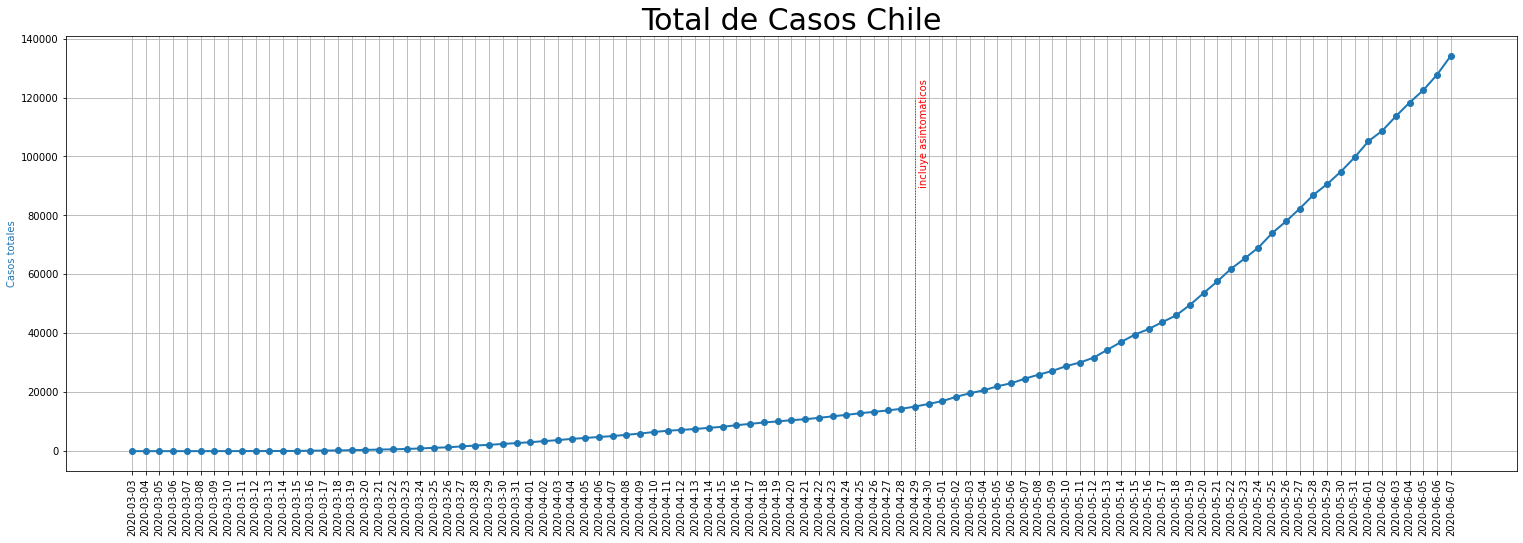

In [88]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales', color=color)
ax3.plot('fechaDia', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
plt.title('Total de Casos Chile', fontsize=30)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 120000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 30000), color = 'r', rotation=90)
plt.show()

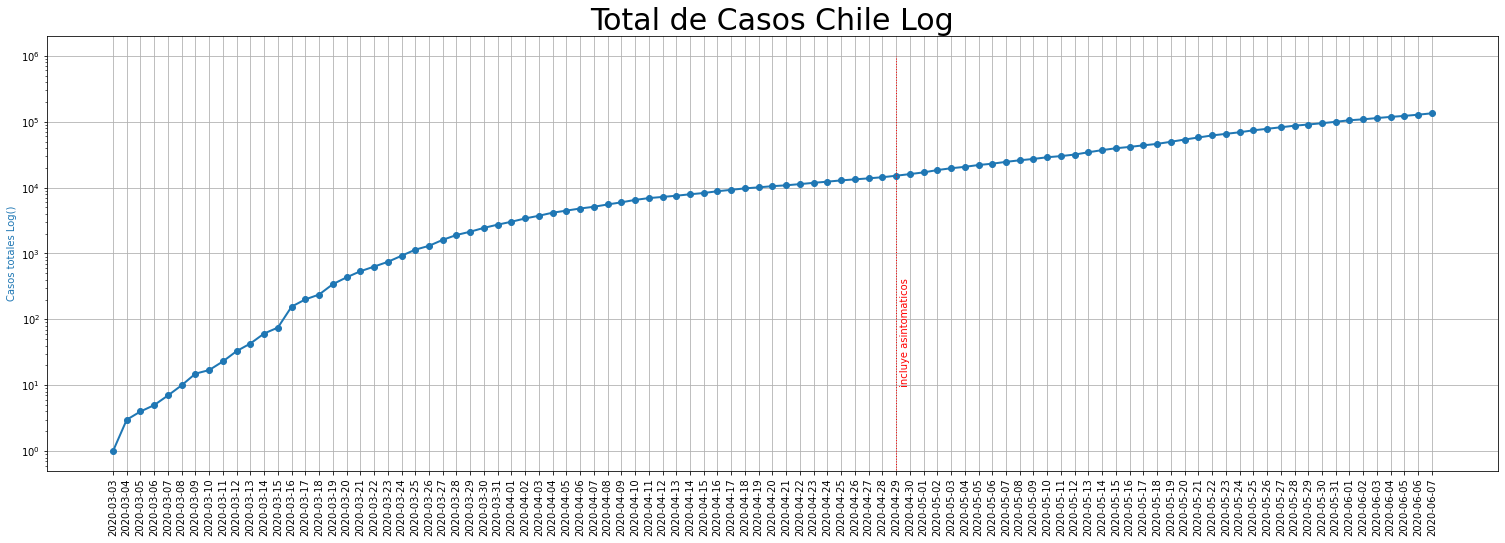

In [89]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales Log()', color=color)
ax3.plot('fechaDia', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
plt.title('Total de Casos Chile Log', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla
plt.yscale('log')

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 1000000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y1 + 10), color = 'r', rotation=90)
plt.show()

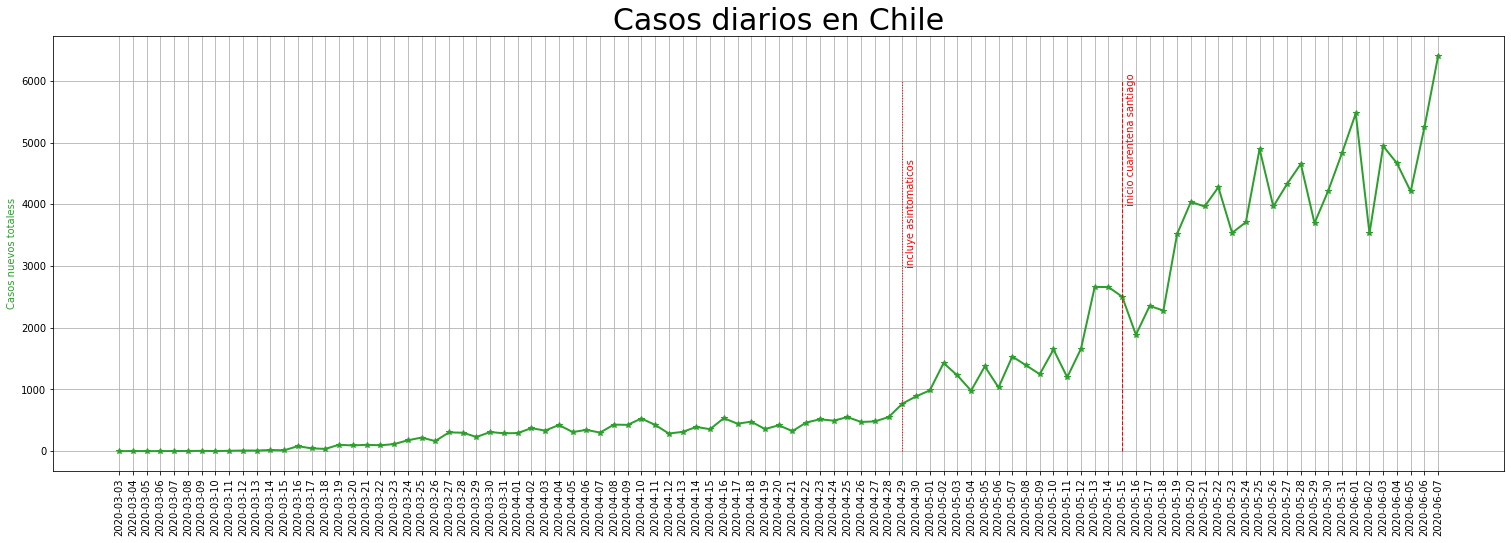

In [90]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:green'
ax3.set_ylabel('Casos nuevos totaless', color=color)
ax3.plot('fechaDia', 'Casos nuevos totales', data=datamin ,color=color,linewidth=2.0, marker='*')
plt.title('Casos diarios en Chile', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 6000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 3000), color = 'r', rotation=90)

# inicio de la cuarentena en santiago viernes 15/05
x10 = 73
x20 = 73
y10 = 0
y20 = 6000
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('inicio cuarentena santiago', xy=(x2, y2), xytext=(x20 + 0.3, y20 - 2000), color = 'r', rotation=90)
plt.show()

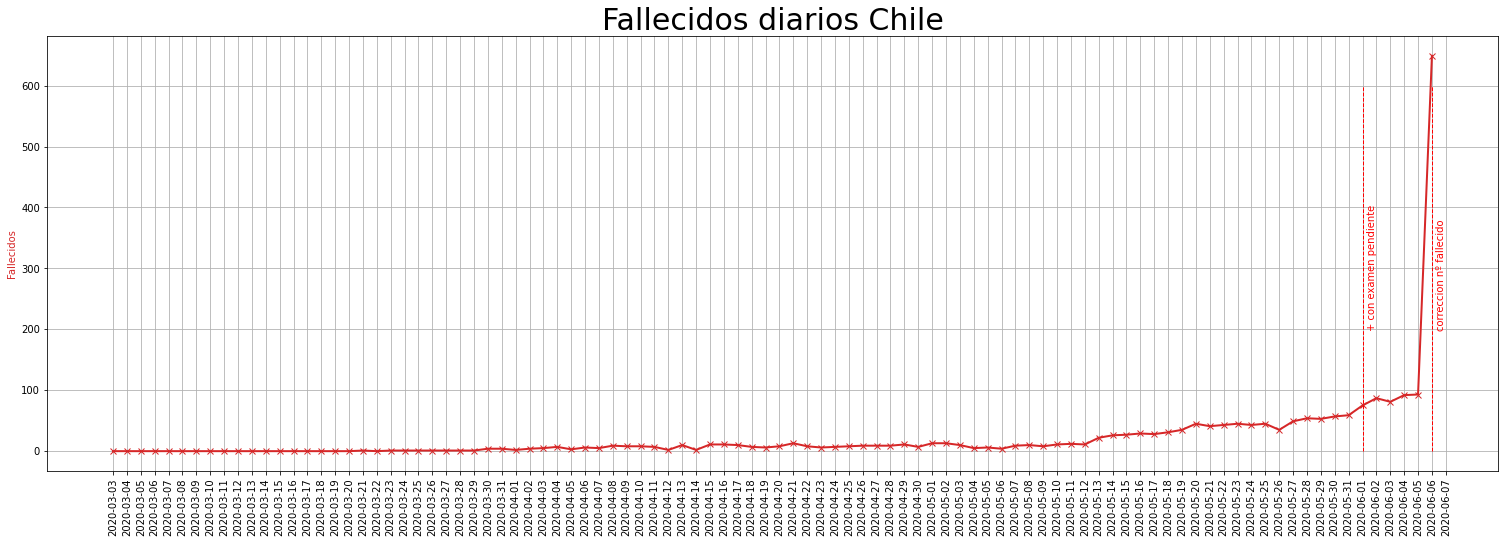

In [106]:
datamin['diaFallecidos'] = datamin['Fallecidos'].shift(-1) - datamin['Fallecidos'] 

fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:red'
ax3.set_ylabel('Fallecidos', color=color)
ax3.plot('fechaDia', 'diaFallecidos', data=datamin ,color=color,linewidth=2.0, marker='x')
plt.title('Fallecidos diarios Chile', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# a partir de la fecha 02/06 se suman aquellos que aun no estaban confirmados 

x10 = 90
x20 = 90
y10 = 0
y20 = 600
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('+ con examen pendiente', xy=(x20, y20), xytext=(x20 + 0.3, y20/3), color = 'r', rotation=90)

# a partir de la fecha 07/06 se corrige la suma de muertos
x10 = 95
x20 = 95
y10 = 0
y20 = 600
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('correccion nº fallecido', xy=(x20, y20), xytext=(x20 + 0.3, y20/3), color = 'r', rotation=90)

plt.show()


# Analisis por Sector (R)

In [92]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#### carga de packages

In [93]:
%%R
install.packages("ggplot")
install.packages("tidyverse")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [0]:
%%R
library(ggplot2)
library(tidyverse)

# Analisis descriptivo

In [95]:
%%R
url2 <- 'https://raw.githubusercontent.com/gmezaarrepol/informacionCovid/master/data-covid19.csv'
data <- read.csv(url2, sep = ',')
str(data)


'data.frame':	1536 obs. of  8 variables:
 $ region           : Factor w/ 16 levels "Antofagasta",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha            : Factor w/ 96 levels "2020/03/03","2020/03/04",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ casos_acum       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ confirmados      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_cada_100mil: num  0 0 0 0 0 0 0 0 0 0 ...
 $ fallecidos_nuevos: int  0 0 0 0 0 0 0 0 0 0 ...
 $ fallecidos_acum  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ notificados_acum : int  NA NA NA NA NA NA NA NA NA NA ...


In [96]:
%%R
# agrupar los datos para el grafico 1
totales <- data %>%
  group_by(region)%>%
  summarize(total = sum(confirmados))
totales

# A tibble: 16 x 2
   region              total
   <fct>               <int>
 1 Antofagasta          3033
 2 Araucanía            2321
 3 Arica y Parinacota    819
 4 Atacama               281
 5 Aysén                  19
 6 Biobío               2490
 7 Coquimbo              898
 8 Los Lagos             985
 9 Los Ríos              400
10 Magallanes           1081
11 Maule                1969
12 Metropolitana      103194
13 Ñuble                1470
14 O’Higgins            1111
15 Tarapacá             3094
16 Valparaíso           4580


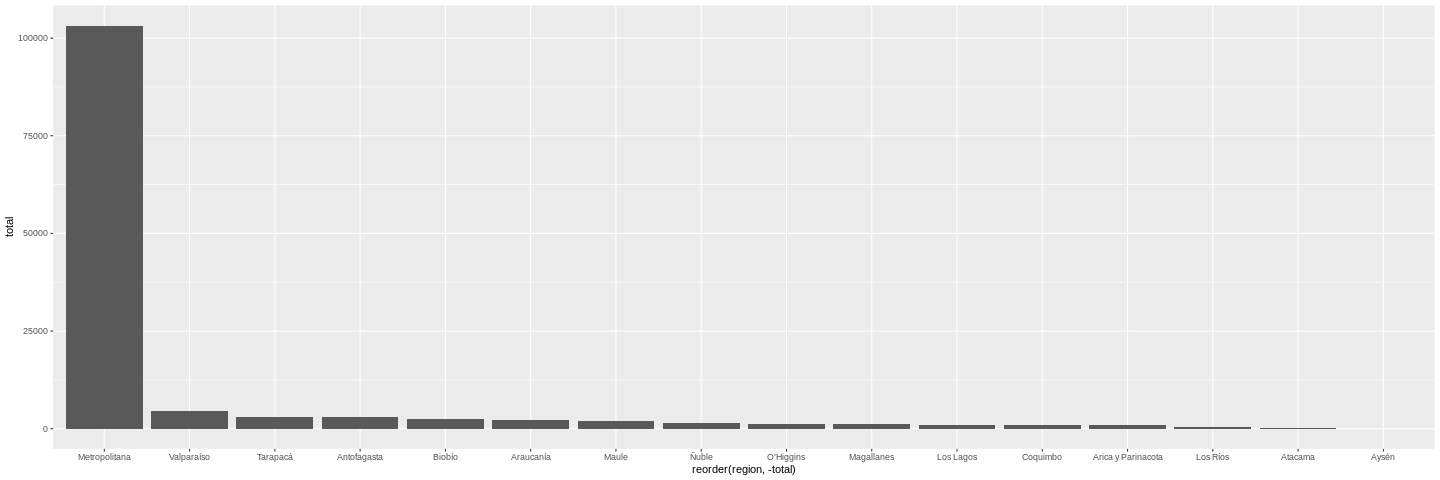

In [97]:
%%R -w 1440 -h 480 -u px
ggplot(totales, aes(x = reorder(region, -total), y = total, group = 1))+
  geom_col()

In [98]:
%%R
# crea los vectores /dataframe de regiones ordenada y poblacion de region, segun Wikipedia
region <- c('Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 
             'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 
              'Maule', 'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 
              'Los Lagos', 'Aysén', 'Magallanes')
orderregion <- seq(1,16,1)
pop <- c(226068, 330558, 607534, 286168, 757586, 1815902, 7112808, 914555, 1044950, 480609, 1556805, 957224, 384837, 828708, 103158, 166533)
regiones <- as.data.frame(cbind(orderregion, region, pop))
regiones$pop <- as.numeric(as.character(regiones$pop))
regiones$orderregion <- as.numeric(as.character(regiones$orderregion))
str(regiones)

'data.frame':	16 obs. of  3 variables:
 $ orderregion: num  1 2 3 4 5 6 7 8 9 10 ...
 $ region     : Factor w/ 16 levels "Antofagasta",..: 3 15 1 4 7 16 12 14 11 13 ...
 $ pop        : num  226068 330558 607534 286168 757586 ...


In [99]:
%%R
totalregion <- merge(x = totales, y = regiones[ , c('region','orderregion', 'pop')], by = 'region', all.x=TRUE)
totalregion

               region  total orderregion     pop
1         Antofagasta   3033           3  607534
2           Araucanía   2321          12  957224
3  Arica y Parinacota    819           1  226068
4             Atacama    281           4  286168
5               Aysén     19          15  103158
6              Biobío   2490          11 1556805
7            Coquimbo    898           5  757586
8           Los Lagos    985          14  828708
9            Los Ríos    400          13  384837
10         Magallanes   1081          16  166533
11              Maule   1969           9 1044950
12      Metropolitana 103194           7 7112808
13              Ñuble   1470          10  480609
14          O’Higgins   1111           8  914555
15           Tarapacá   3094           2  330558
16         Valparaíso   4580           6 1815902


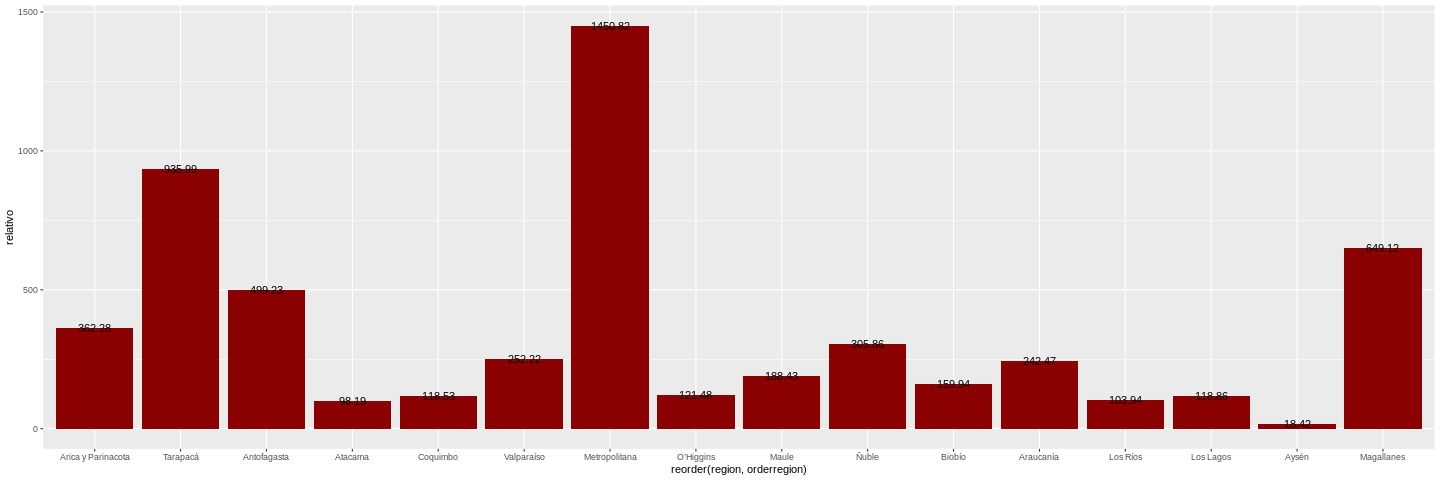

In [131]:
%%R -w 1440 -h 480 -u px
totalperc <- totalregion %>%
  mutate(relativo = (total/pop)*100000)

ggplot(totalperc, aes(x = reorder(region, orderregion), y = relativo, group = 1))+
  geom_col(fill = 'darkred')+
  geom_text(label = round(totalperc$relativo, digits = 2))
  #sprintf("%0.2f", round(a, digits = 2)


In [0]:
%%R
# agrupar los datos para el grafico 1
totalfecha <- data %>%
  group_by(region, fecha)%>%
  summarize(total = sum(confirmados))

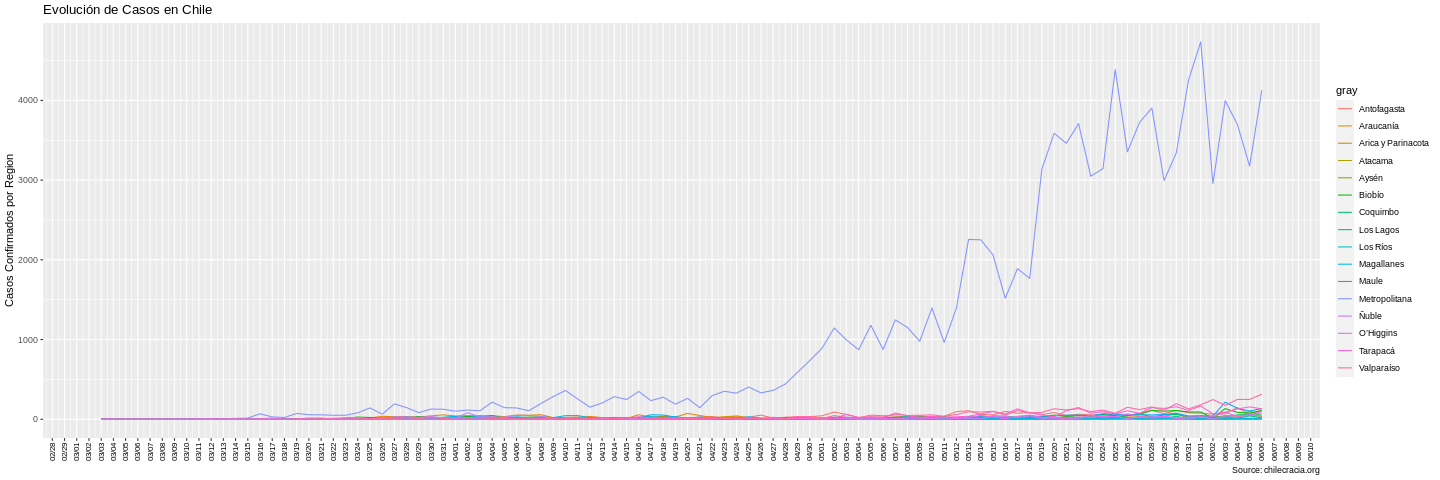

In [118]:
%%R -w 1440 -h 480 -u px
ggplot(totalfecha, aes(x = as.Date(fecha), y = total, group = region, color = region))+
  geom_line()+
  ggtitle('Evolución de Casos en Chile')+
  labs(caption="Source: chilecracia.org", color = 'gray')+
  xlab('Fecha')+
  scale_x_date(date_labels = "%m/%d", date_breaks = 'day')+
  ylab('Casos Confirmados por Region')+ 
  theme(axis.text.x = element_text(
    colour = 'black', angle = 90, size = 8,
    hjust = 0.5, vjust = 0.5),axis.title.x=element_blank())

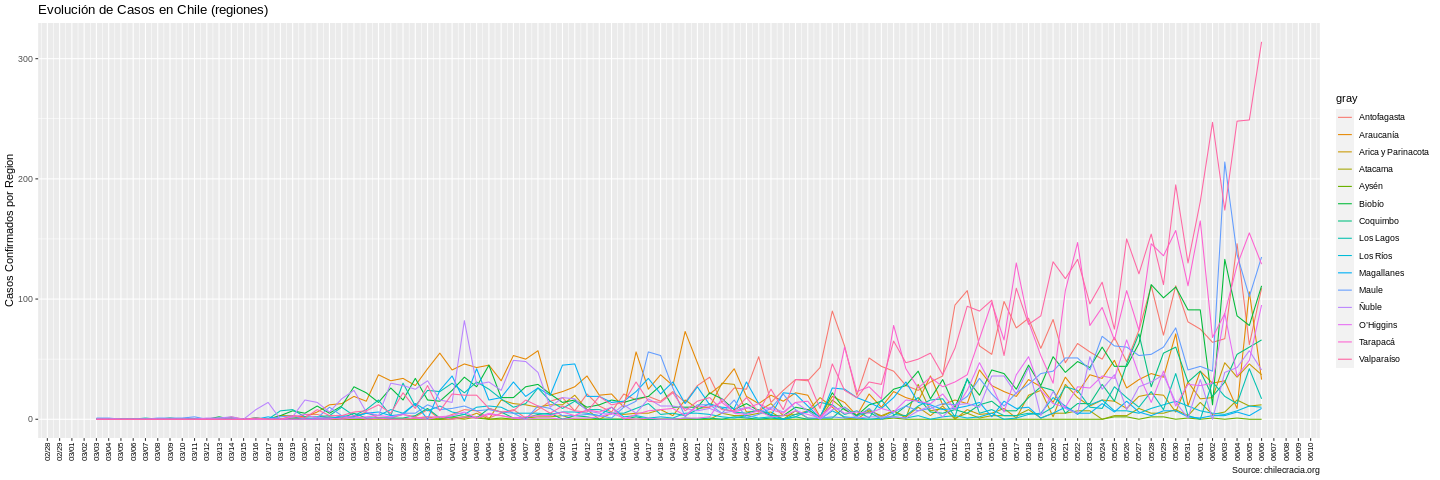

In [126]:
%%R -w 1440 -h 480 -u px
# agrupar los datos para el grafico 1
totalNoStgo<- data %>%
  filter(region != 'Metropolitana')%>%
  group_by(region, fecha)%>%
  summarize(total = sum(confirmados))


ggplot(totalNoStgo, aes(x = as.Date(fecha), y = total, group = region, color = region))+
  geom_line()+
  ggtitle('Evolución de Casos en Chile (regiones)')+
  labs(caption="Source: chilecracia.org", color = 'gray')+
  xlab('Fecha')+
  scale_x_date(date_labels = "%m/%d", date_breaks = 'day')+
  ylab('Casos Confirmados por Region')+ 
  theme(axis.text.x = element_text(
    colour = 'black', angle = 90, size = 8,
    hjust = 0.5, vjust = 0.5),axis.title.x=element_blank())

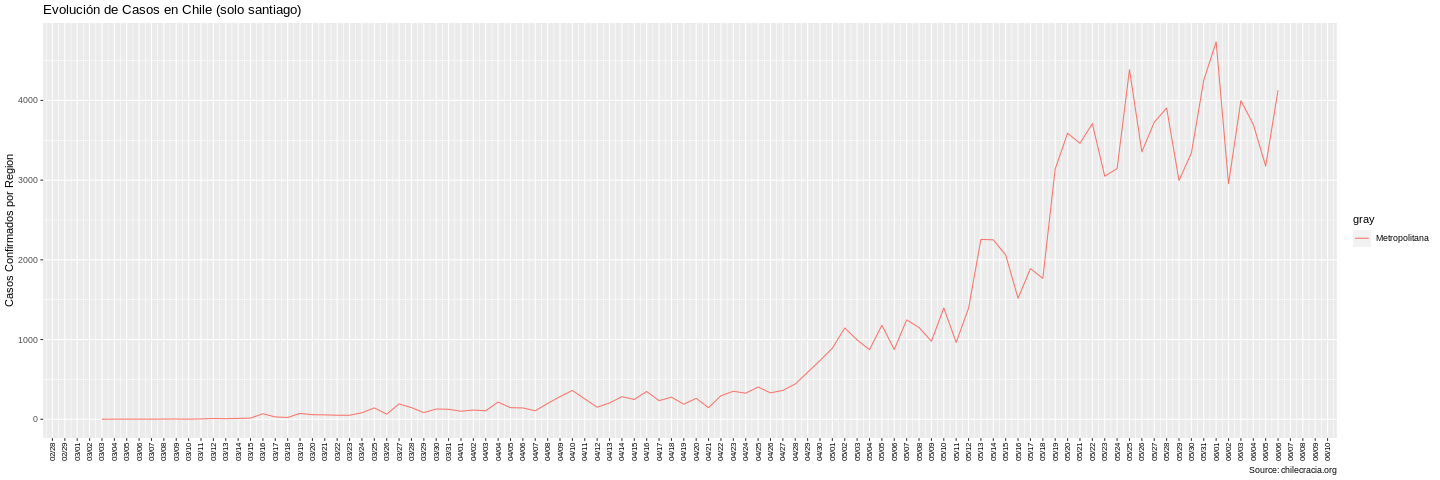

In [127]:
%%R -w 1440 -h 480 -u px
# agrupar los datos para el grafico 1
totalStgo<- data %>%
  filter(region == 'Metropolitana')%>%
  group_by(region, fecha)%>%
  summarize(total = sum(confirmados))


ggplot(totalStgo, aes(x = as.Date(fecha), y = total, group = region, color = region))+
  geom_line()+
  ggtitle('Evolución de Casos en Chile (solo santiago)')+
  labs(caption="Source: chilecracia.org", color = 'gray')+
  xlab('Fecha')+
  scale_x_date(date_labels = "%m/%d", date_breaks = 'day')+
  ylab('Casos Confirmados por Region')+ 
  theme(axis.text.x = element_text(
    colour = 'black', angle = 90, size = 8,
    hjust = 0.5, vjust = 0.5),axis.title.x=element_blank())